This is a notebook of Exploratory data analysis of H1B visa for the year 2023. 

About the Dataset
This dataset provides a comprehensive record of Labor Condition Application (LCA) disclosures for H1B visa petitions filed with the U.S. Department of Labor (DOL) 2023. The H1B visa is a non-immigrant visa that allows U.S. companies to employ foreign workers in specialty occupations requiring theoretical or technical expertise. These roles typically include fields such as IT, engineering, finance, healthcare, and more. The H1B program is critical for addressing skill gaps in the U.S. workforce and supporting economic growth.

Key features
Years Covered: 2023.
Number of Records: Includes all LCAs filed during this period.
Attributes: Comprehensive fields such as case number, job title, employer name, wage data, work location, and visa classification.
Source: Data is based on public disclosures from the U.S. Department of Labor.

Source of Dataset 
https://www.kaggle.com/datasets/zongaobian/h1b-lca-disclosure-data-2020-2024/data?select=Combined_LCA_Disclosure_Data_FY2023.csv

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
print(pd.__version__)

2.2.3


In [4]:
print(np.__version__)

2.0.2


In [5]:
print(sns.__version__)

0.13.2


In [6]:
import matplotlib
print(matplotlib.__version__)

3.9.4


In [7]:
# Load Dataset

h1b_visa_data_2023 = pd.read_csv("data/Combined_LCA_Disclosure_Data_FY2023.csv")

In [8]:
# Data Analysis 

h1b_visa_data_2023.head()

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,APPENDIX_A_ATTACHED,PUBLIC_DISCLOSURE,PREPARER_LAST_NAME,PREPARER_FIRST_NAME,PREPARER_MIDDLE_INITIAL,PREPARER_BUSINESS_NAME,PREPARER_EMAIL
0,I-200-22356-657078,Certified,2022-12-22,2022-12-30,NaN,H-1B,DevOps Engineer II,15-1252.00,Software Developers,Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
1,I-200-22356-657600,Certified,2022-12-22,2022-12-30,NaN,H-1B,FE Engineer,17-2072.00,"Electronics Engineers, Except Computer",Y,...,No,NaN,NaN,NaN,Disclose Business,NAKAMURA,ANNE,M,"FRAGOMEN, DEL REY, BERNSEN & LOEWY, LLP.",hbal@fragomen.com
2,I-200-22356-657298,Certified,2022-12-22,2022-12-30,NaN,H-1B,Control Sys Engineer,17-2141.00,Mechanical Engineers,Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
3,I-200-22356-657871,Certified,2022-12-22,2022-12-30,NaN,H-1B,Senior Lecturer,25-1021.00,"Computer Science Teachers, Postsecondary",Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
4,I-200-22356-657847,Certified,2022-12-22,2022-12-30,NaN,H-1B,Principal Payment Tech Development,15-1252.00,Software Developers,Y,...,No,NaN,NaN,NaN,Disclose Business,Chegu,Reshma,NaN,"Fragomen, Del Rey, Bernsen & Loewy, LLP",rchegu@fragomen.com


In [9]:
# Features of the data
h1b_visa_data_2023.columns

Index(['CASE_NUMBER', 'CASE_STATUS', 'RECEIVED_DATE', 'DECISION_DATE',
       'ORIGINAL_CERT_DATE', 'VISA_CLASS', 'JOB_TITLE', 'SOC_CODE',
       'SOC_TITLE', 'FULL_TIME_POSITION', 'BEGIN_DATE', 'END_DATE',
       'TOTAL_WORKER_POSITIONS', 'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT',
       'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT',
       'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'EMPLOYER_NAME',
       'TRADE_NAME_DBA', 'EMPLOYER_ADDRESS1', 'EMPLOYER_ADDRESS2',
       'EMPLOYER_CITY', 'EMPLOYER_STATE', 'EMPLOYER_POSTAL_CODE',
       'EMPLOYER_COUNTRY', 'EMPLOYER_PROVINCE', 'EMPLOYER_PHONE',
       'EMPLOYER_PHONE_EXT', 'NAICS_CODE', 'EMPLOYER_POC_LAST_NAME',
       'EMPLOYER_POC_FIRST_NAME', 'EMPLOYER_POC_MIDDLE_NAME',
       'EMPLOYER_POC_JOB_TITLE', 'EMPLOYER_POC_ADDRESS1',
       'EMPLOYER_POC_ADDRESS2', 'EMPLOYER_POC_CITY', 'EMPLOYER_POC_STATE',
       'EMPLOYER_POC_POSTAL_CODE', 'EMPLOYER_POC_COUNTRY',
       'EMPLOYER_POC_PROVINCE', 'EMPLOYER_POC_PHONE', 'EMPLOYER_POC

In [10]:
# Shape of the data 

h1b_visa_data_2023.shape

(644607, 96)

In [11]:
# Info of the data

h1b_visa_data_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644607 entries, 0 to 644606
Data columns (total 96 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   CASE_NUMBER                     644607 non-null  object 
 1   CASE_STATUS                     644607 non-null  object 
 2   RECEIVED_DATE                   644607 non-null  object 
 3   DECISION_DATE                   644607 non-null  object 
 4   ORIGINAL_CERT_DATE              41957 non-null   object 
 5   VISA_CLASS                      644607 non-null  object 
 6   JOB_TITLE                       644607 non-null  object 
 7   SOC_CODE                        644607 non-null  object 
 8   SOC_TITLE                       644607 non-null  object 
 9   FULL_TIME_POSITION              644607 non-null  object 
 10  BEGIN_DATE                      644607 non-null  object 
 11  END_DATE                        644607 non-null  object 
 12  TOTAL_WORKER_POS

In [12]:
# Statistical description

h1b_visa_data_2023.describe()

,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,EMPLOYER_PHONE,EMPLOYER_PHONE_EXT,NAICS_CODE,EMPLOYER_POC_PHONE,EMPLOYER_POC_PHONE_EXT,AGENT_ATTORNEY_PHONE,AGENT_ATTORNEY_PHONE_EXT,WORKSITE_WORKERS,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,PREVAILING_WAGE,PW_OTHER_YEAR,TOTAL_WORKSITE_LOCATIONS
count,644607.000000,644607.000000,644607.000000,644607.000000,644607.000000,644607.000000,644607.000000,6.446070e+05,38837.000000,644607.000000,6.446070e+05,37527.000000,4.704340e+05,28450.000000,644606.000000,6.446060e+05,2.093320e+05,644606.000000,29214.000000,644607.000000
mean,1.786774,0.707501,0.326310,0.148270,0.012682,0.290946,0.321568,1.583330e+10,458.055900,425370.382745,1.638068e+10,635.787193,1.512327e+10,953.940949,1.782545,1.158147e+05,1.414622e+05,98648.625744,2021.963579,1.485657
std,5.982872,4.709057,2.103792,1.723084,1.638036,1.768087,1.956156,4.980897e+10,1270.982256,208843.999615,7.747959e+10,1537.165210,1.365235e+10,2293.689845,5.930644,7.138029e+04,9.762760e+04,42924.522182,1.229957,0.740470
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.074728e+09,0.000000,-4445.000000,1.000000e+09,0.000000,1.212279e+09,0.000000,1.000000,7.250000e+00,1.000000e+01,7.250000,1990.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.312396e+10,0.000000,334220.000000,1.312232e+10,0.000000,1.310479e+10,93.000000,1.000000,8.436500e+04,1.000010e+05,75213.000000,2022.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.512648e+10,0.000000,541511.000000,1.516405e+10,0.000000,1.416944e+10,125.000000,1.000000,1.095000e+05,1.323735e+05,98842.000000,2022.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.732509e+10,123.000000,541512.000000,1.720379e+10,305.000000,1.703544e+10,230.000000,1.000000,1.431870e+05,1.733199e+05,122699.000000,2023.000000,2.000000
max,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,9.769530e+12,9844.000000,928120.000000,9.767632e+12,9844.000000,5.986516e+12,9866.000000,1098.000000,1.756867e+07,2.113647e+07,489250.000000,2023.000000,10.000000


In [13]:
# Data cleaning

h1b_visa_data_2023.isnull().sum()

CASE_NUMBER                     0
CASE_STATUS                     0
RECEIVED_DATE                   0
DECISION_DATE                   0
ORIGINAL_CERT_DATE         602650
                            ...  
PREPARER_LAST_NAME         319681
PREPARER_FIRST_NAME        319676
PREPARER_MIDDLE_INITIAL    545443
PREPARER_BUSINESS_NAME     313110
PREPARER_EMAIL             315428
Length: 96, dtype: int64

In [14]:
# Handling missing values

h1b_visa_data_2023.fillna(h1b_visa_data_2023.median(numeric_only=True),inplace=True)

In [15]:
column_list = h1b_visa_data_2023.columns.tolist()

for column_list in column_list:
    print(column_list,h1b_visa_data_2023[column_list].isnull().sum())
   

CASE_NUMBER 0
CASE_STATUS 0
RECEIVED_DATE 0
DECISION_DATE 0
ORIGINAL_CERT_DATE 602650
VISA_CLASS 0
JOB_TITLE 0
SOC_CODE 0
SOC_TITLE 0
FULL_TIME_POSITION 0
BEGIN_DATE 0
END_DATE 0
TOTAL_WORKER_POSITIONS 0
NEW_EMPLOYMENT 0
CONTINUED_EMPLOYMENT 0
CHANGE_PREVIOUS_EMPLOYMENT 0
NEW_CONCURRENT_EMPLOYMENT 0
CHANGE_EMPLOYER 0
AMENDED_PETITION 0
EMPLOYER_NAME 0
TRADE_NAME_DBA 585693
EMPLOYER_ADDRESS1 0
EMPLOYER_ADDRESS2 350973
EMPLOYER_CITY 0
EMPLOYER_STATE 198
EMPLOYER_POSTAL_CODE 0
EMPLOYER_COUNTRY 0
EMPLOYER_PROVINCE 605533
EMPLOYER_PHONE 0
EMPLOYER_PHONE_EXT 0
NAICS_CODE 0
EMPLOYER_POC_LAST_NAME 4
EMPLOYER_POC_FIRST_NAME 0
EMPLOYER_POC_MIDDLE_NAME 523780
EMPLOYER_POC_JOB_TITLE 0
EMPLOYER_POC_ADDRESS1 0
EMPLOYER_POC_ADDRESS2 343766
EMPLOYER_POC_CITY 0
EMPLOYER_POC_STATE 737
EMPLOYER_POC_POSTAL_CODE 3
EMPLOYER_POC_COUNTRY 3
EMPLOYER_POC_PROVINCE 643233
EMPLOYER_POC_PHONE 0
EMPLOYER_POC_PHONE_EXT 0
EMPLOYER_POC_EMAIL 13918
AGENT_REPRESENTING_EMPLOYER 0
AGENT_ATTORNEY_LAST_NAME 174173
AGENT_ATTO

In [16]:
# Dropping null rows

h1b_visa_data_2023 = h1b_visa_data_2023.dropna(subset=["EMPLOYER_STATE", "WORKSITE_STATE"])

In [17]:
# Checking for duplicates 

h1b_visa_data_2023.duplicated().sum()

np.int64(97933)

In [18]:
# Removing duplicate entry 

h1b_visa_data_2023.drop_duplicates(inplace=True)

In [19]:
# Verifying the removal of duplicates

h1b_visa_data_2023.duplicated().sum()

np.int64(0)

In [21]:
# Checking the unique values of case status

h1b_visa_data_2023['CASE_STATUS'].unique()

array(['Certified', 'Certified - Withdrawn', 'Denied', 'Withdrawn'],
      dtype=object)

In [22]:
# Counting the values of each case status

h1b_visa_data_2023['CASE_STATUS'].value_counts()

CASE_STATUS
Certified                500839
Certified - Withdrawn     33461
Withdrawn                  9553
Denied                     2622
Name: count, dtype: int64

In 2023, there were 500839 certified applicant which means 91.64% of the total applicant were approved. Similarly, 33,461 were approved initially, but the employer later decided to withdraw it. 9553 withdrawn their application whereas only 2622(0.48%) were denied. 

In [23]:
# Filtered dataset for certified case only 

h1b_visa_data_2023_certified = h1b_visa_data_2023[h1b_visa_data_2023['CASE_STATUS']=='Certified']

In [24]:
# Distribution of job title on certified case 

h1b_visa_data_2023_certified['JOB_TITLE'].value_counts().head(60)

JOB_TITLE
Software Engineer                                               27024
Software Developer                                              16962
Senior Software Engineer                                         6206
SOFTWARE DEVELOPER                                               5414
Manager JC50                                                     4284
Assistant Professor                                              4117
SOFTWARE ENGINEER                                                3981
Software Development Engineer I                                  2607
Analyst                                                          2407
Data Engineer                                                    2405
Associate                                                        2396
Architect                                                        2395
Software Development Engineer II                                 2327
Data Scientist                                                   2059
Senior Sys

In [25]:
h1b_visa_data_2023_certified['JOB_TITLE'].value_counts().tail(60)

JOB_TITLE
Vice President, BXTI Credit                                     1
Business Account Manager                                        1
MS Sr Systems Analyst                                           1
Senior Technical Support Engineer, Premier Support              1
Senior Data Engineer (017040.001021)                            1
Accountants and Auditors - KBGFJG218465-1                       1
Product Support and Test Engineer                               1
Senior Engagement Manager (Management Analyst)                  1
Manufacturing Launch Engineer                                   1
Lead MDM Developer                                              1
Financial Analysist  III- MBA                                   1
Global Director of Analytics Services                           1
Marketing Data Science Manager                                  1
Senior Manager, IT Risk & Controls                              1
Director of Rooms Operations                                    1


In [26]:
# Assuming `h1b_visa_data_2023_certified` is a DataFrame
job_title_counts = h1b_visa_data_2023_certified['JOB_TITLE'].value_counts()


# Save the output to a text file
with open('job_title_counts_2023.txt', 'w') as f:
    f.write(job_title_counts.to_string())

In [27]:
# Distribution plot of top 10 Job Status
top_jobs = h1b_visa_data_2023_certified["JOB_TITLE"].value_counts().head(10)

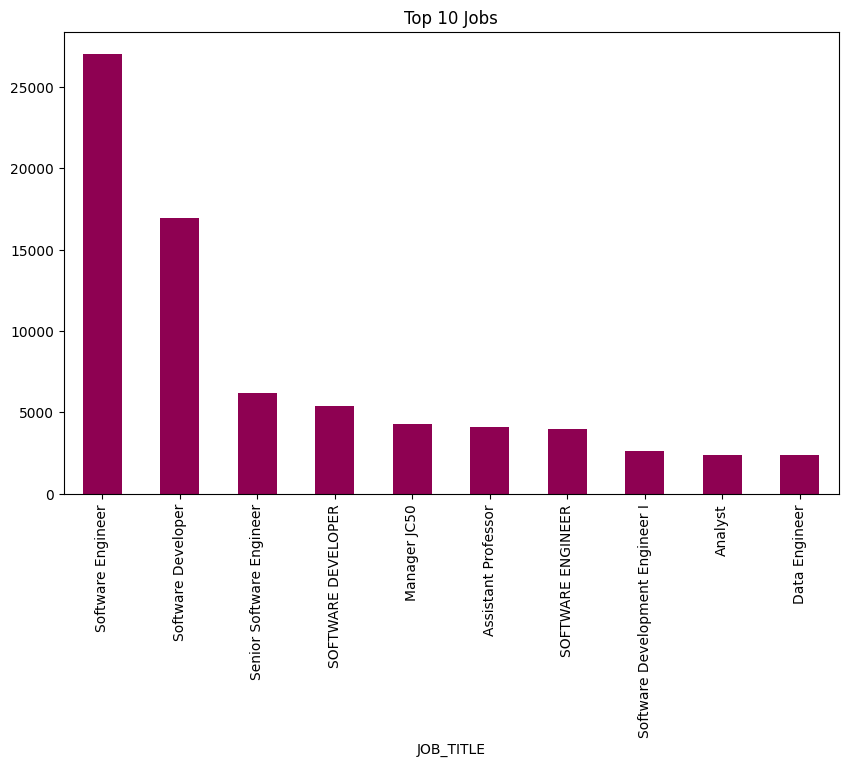

In [28]:
# plot bar graph
top_jobs.plot(kind="bar",title="Top 10 Jobs",figsize=(10,6),colormap='PiYG')
plt.show()

From the above data, mostly the IT professionals are highly certified such as Software Engineer, Software Developer, and Senior Software Engineer.


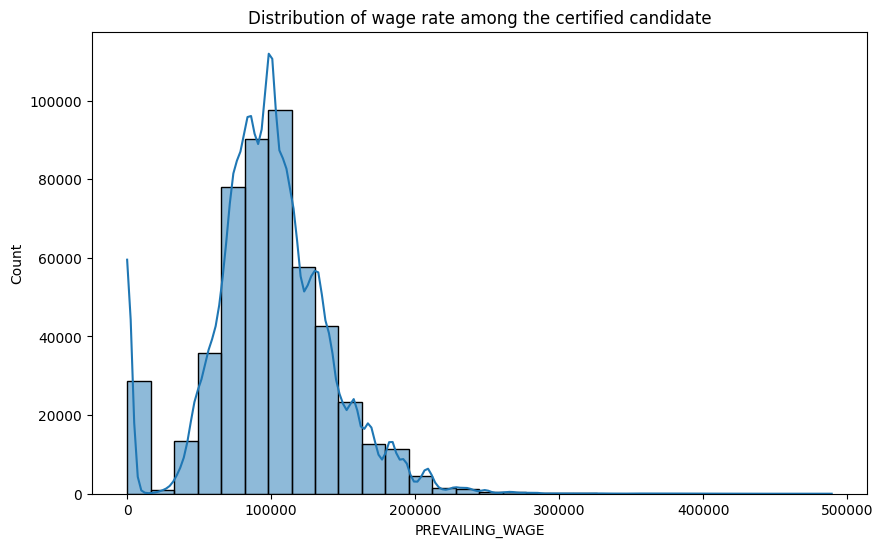

In [29]:
# Distribution of Prevailing wage with Histogram plot

plt.figure(figsize=(10,6))
sns.histplot(h1b_visa_data_2023_certified["PREVAILING_WAGE"],bins=30,kde=True)
plt.title("Distribution of wage rate among the certified candidate")
plt.show()



The graph shows that most H1B-certified candidates earn wages clustered in the lower to mid-range, with a significant concentration around $100,000 or below, as indicated by the tallest bars. The frequency of certified applicants sharply declines as wages exceed this range, reflecting compliance with prevailing wage standards and typical salary structures in industries like tech and engineering.

In [30]:
# Distribution of worksite states

top_worksite_state = h1b_visa_data_2023_certified["WORKSITE_STATE"].value_counts().head(10)


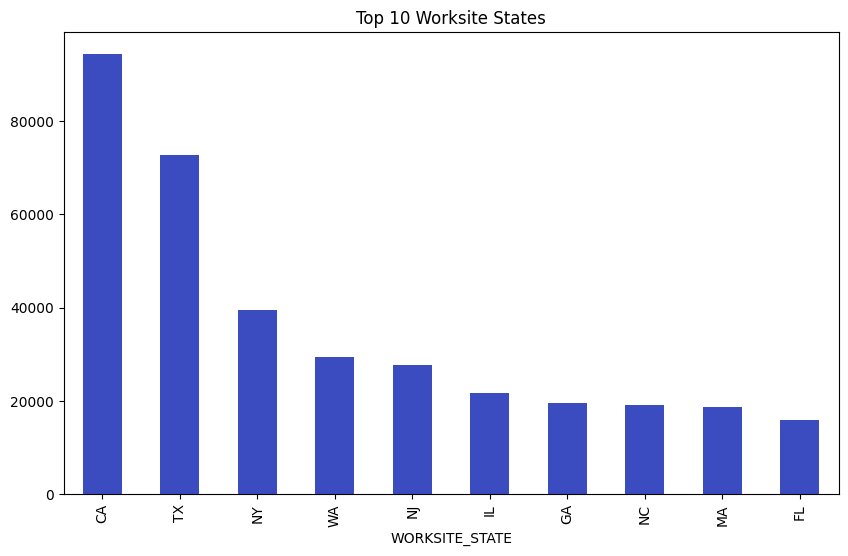

In [31]:
# plot bar graph for worksite states

top_worksite_state.plot(kind="bar",title="Top 10 Worksite States",figsize=(10,6),colormap='coolwarm')
plt.show()

The bar plot shows the top 10 states with the highest number of certified H-1B visa applications in 2023. California has the highest number of certified H-1B applications, followed by Texas and New York. The remaining states including, Washington, New Jersey, Illinois, Georgia, North Carolina, Massachusetts, and Florida have a progressively decreasing number of applications.

In [33]:
# Average wage by states

average_wage_by_state = h1b_visa_data_2023_certified.groupby("WORKSITE_STATE")["WAGE_RATE_OF_PAY_FROM"].mean().sort_values(ascending=False)
print(average_wage_by_state)

WORKSITE_STATE
WV    169943.593452
WA    143772.954806
CA    142622.665116
ME    131254.613458
NY    128594.828167
DE    113585.696208
DC    113106.224284
MA    111854.256896
MS    111568.956937
NJ    110880.102526
NV    109326.541994
RI    108652.660282
CO    108546.031674
OR    108542.011634
CT    106286.293462
VA    106214.511813
NH    105663.784394
IL    105497.172739
TX    105095.924630
GA    104636.489540
MD    104319.532418
AZ    104263.762055
NC    104251.924062
AL    104089.851210
AR    104002.469591
PA    103014.992258
SD    101699.132245
FL    100878.251116
IA    100056.188894
LA     99585.223718
ID     99153.797469
KY     98928.751927
MN     98340.620029
OH     98048.045655
WI     97814.808558
MO     97030.145116
HI     96612.939338
KS     96560.549268
TN     96360.847500
UT     95857.662527
SC     93440.014295
MI     92387.740549
IN     92308.100683
NE     92115.958607
VT     91913.464412
OK     90096.976432
AK     89533.543429
MT     89379.575867
NM     89200.897396
WY   

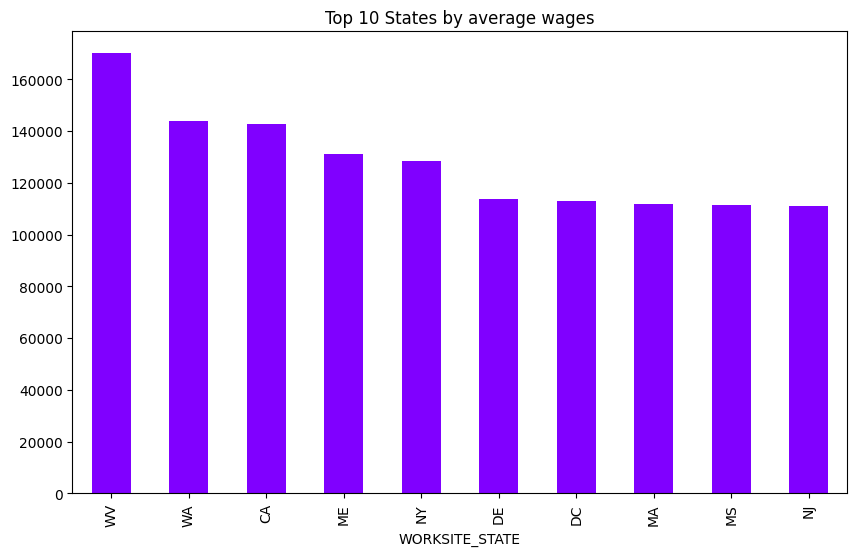

In [34]:
# plot bar graph of top 10 average wage by state 
average_wage_by_state.head(10).plot(kind="bar",title="Top 10 States by average wages",figsize=(10,6),colormap='rainbow')
plt.show()

The bar chart presents the top 10 states with the highest average wages for H1B visa applications in 2023. West Virginia leads with the highest average wage, followed by Washington and California. The remaining states, including Maine, New York, Delaware, District of Columbia, Massachusetts, Mississippi, and New Jersey show a gradual decrease in average wages.

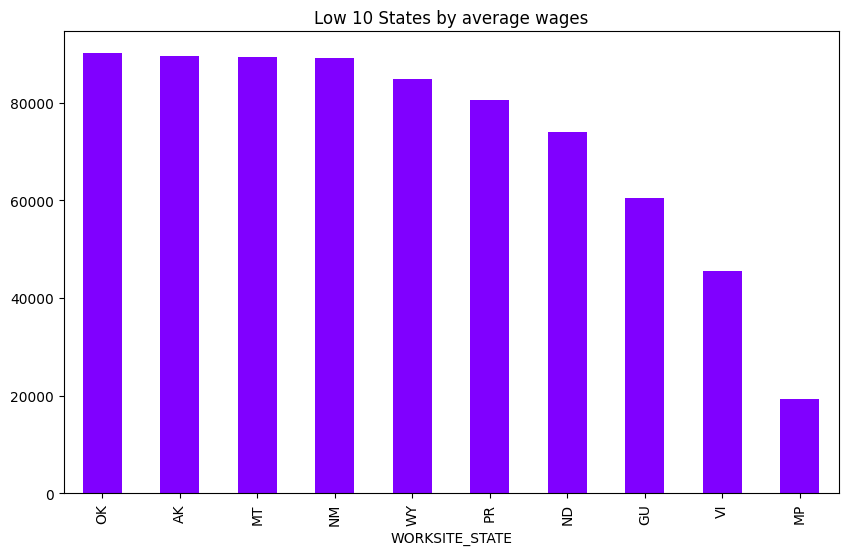

In [35]:
# plot bar graph of low 10 average wage by state 
average_wage_by_state.tail(10).plot(kind="bar",title="Low 10 States by average wages",figsize=(10,6),colormap='rainbow')
plt.show()

The bar chart presents the bottom 10 states with the lowest average wages for H1B visa applications in 2023. Oklahoma has the lowest average wage, followed by Alaska and Montana. The remaining states, including New Mexico, Wyoming, Puerto Rico, North Dakota, Guam, Virgin Islands, and Northern Mariana Islands, show a gradual increase in average wages.

In [36]:
# Distribution plot of top 10 SOC_TITLE
top_soc_title = h1b_visa_data_2023_certified["SOC_TITLE"].value_counts().head(10)
print(top_soc_title)

SOC_TITLE
Software Developers                                171785
Computer Systems Analysts                           28356
Computer Systems Engineers/Architects               23507
Information Technology Project Managers             17277
Software Quality Assurance Analysts and Testers     15071
Computer and Information Systems Managers           11535
Data Scientists                                     10557
Computer Programmers                                10023
Accountants and Auditors                             9187
Business Intelligence Analysts                       8801
Name: count, dtype: int64


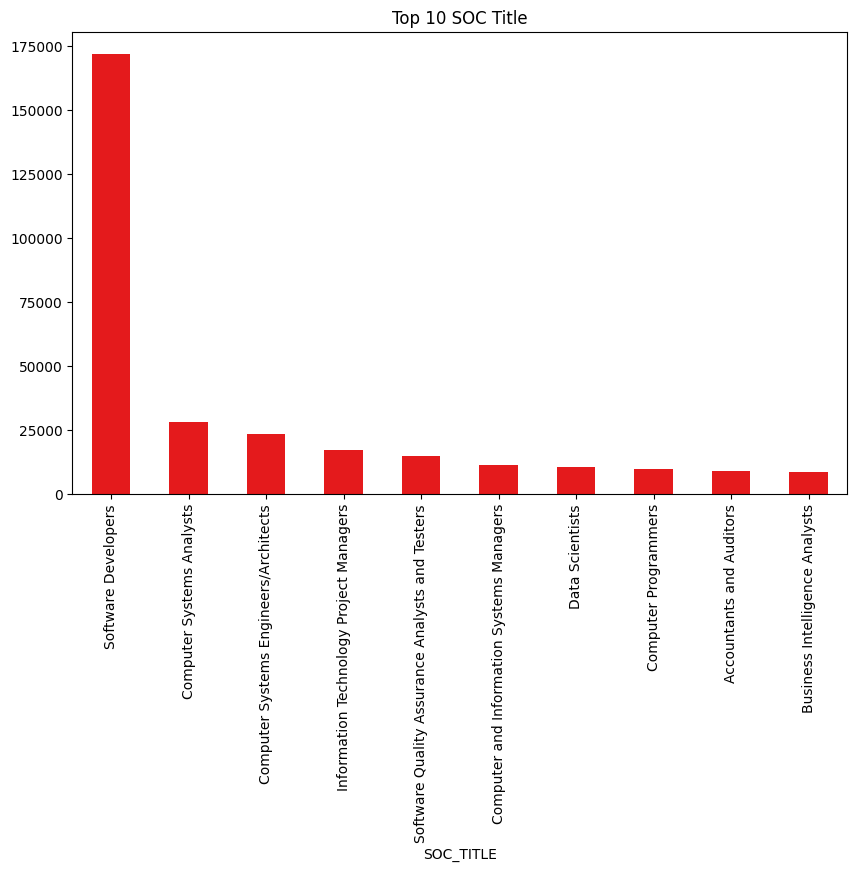

In [38]:
# Bar plot of top 10 soc_title
top_soc_title.plot(kind="bar",title="Top 10 SOC Title",figsize=(10,6),colormap="Set1")
plt.show()

In [39]:
# Distribution plot of bottom 10 SOC_TITLE
bottom_soc_title = h1b_visa_data_2023_certified["SOC_TITLE"].value_counts().tail(10)
print(bottom_soc_title)

SOC_TITLE
Diagnostic Medical Sonographers                                  1
FOOD SCIENTIST AND TECHNOLOGIST                                  1
Medical Transcriptionists                                        1
Radio, Cellular, and Tower Equipment Installers and Repairers    1
Property, Real Estate, and Community Association M               1
BUSINESS TEACHERS, POSTSECONDARY                                 1
ENGINEERING TEACHERS, POST SECONDARY                             1
ELECTRONICS ENGINEERS, EXCEPT COMPUTERS                          1
Architects                                                       1
Tool and Die Makers                                              1
Name: count, dtype: int64


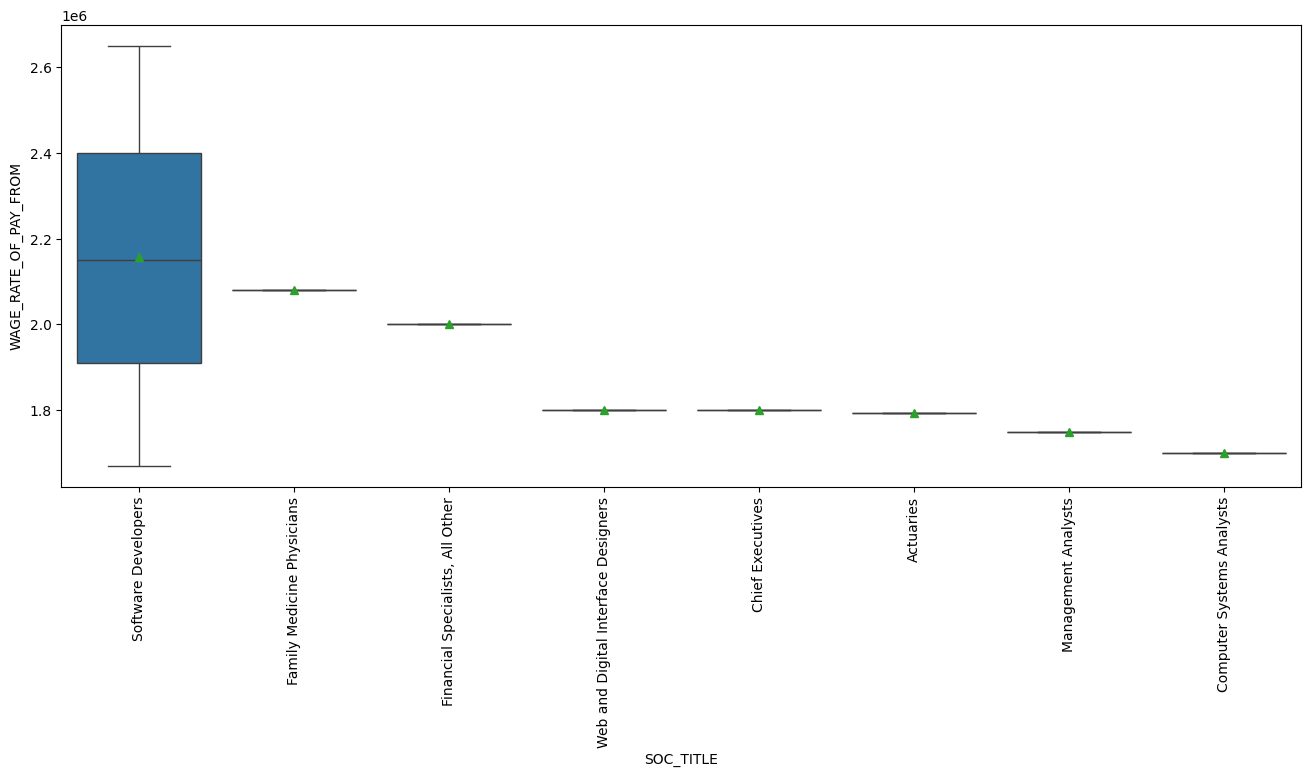

In [40]:
# Wages by Job title

plt.figure(figsize=(16,6))
sns.boxplot(data=h1b_visa_data_2023_certified[["SOC_TITLE",
                                               "WAGE_RATE_OF_PAY_FROM"]].sort_values(by="WAGE_RATE_OF_PAY_FROM",
                                                                                     ascending=False).head(10),x="SOC_TITLE",
                                                                                     y="WAGE_RATE_OF_PAY_FROM",showmeans=True)
plt.xticks(rotation=90)
plt.show()


In [41]:
# Top employers getting H1B visa certified

top_employers = h1b_visa_data_2023_certified["EMPLOYER_NAME"].value_counts().head(20)
print(top_employers)

EMPLOYER_NAME
COGNIZANT TECHNOLOGY SOLUTIONS US CORP    12963
Amazon.com Services LLC                   11644
Ernst & Young U.S. LLP                    10828
Google LLC                                 9669
Microsoft Corporation                      7819
INFOSYS LIMITED                            7779
TATA CONSULTANCY SERVICES LIMITED          5704
Apple Inc.                                 3951
HCL AMERICA INC                            3621
Intel Corporation                          3550
Accenture LLP                              3458
Amazon Web Services, Inc.                  3202
CAPGEMINI AMERICA INC                      3191
Qualcomm Technologies, Inc.                3032
WIPRO LIMITED                              2857
Meta Platforms, Inc.                       2852
Tata Consultancy Services Limited          2791
WAL-MART ASSOCIATES, INC.                  2772
IBM Corporation                            2211
Deloitte Consulting LLP                    2187
Name: count, dtype: int64


In [42]:
# Bottom employers getting H1B visa certified

bottom_employers = h1b_visa_data_2023_certified["EMPLOYER_NAME"].value_counts().tail(10)
print(bottom_employers)

EMPLOYER_NAME
Vigorito, Barker, Patterson, Nichols & Porter, LLP    1
TSQ Systems Inc.                                      1
Opportune LLP                                         1
Satelytics, Inc.                                      1
DHARMACON INC.                                        1
PECOS INN, LLC                                        1
Pacific Sports, Inc.                                  1
AKI TECHNOLOGIES, INC.                                1
THAKKAR                                               1
Just Imagine, Inc.                                    1
Name: count, dtype: int64


In [43]:
employer = h1b_visa_data_2023_certified["EMPLOYER_NAME"].value_counts()

# Save the output to a text file
with open('employer-2023.txt', 'w') as f:
    f.write(employer.to_string())

In [45]:
# Agents representing employers 

agents = h1b_visa_data_2023_certified["AGENT_REPRESENTING_EMPLOYER"].value_counts().head(10)
print(agents)

AGENT_REPRESENTING_EMPLOYER
Yes    367612
No     133227
Name: count, dtype: int64


In [46]:
# Remote work trends

h1b_visa_data_2023_certified["RECEIVED_DATE"] = pd.to_datetime(h1b_visa_data_2023_certified["RECEIVED_DATE"], errors='coerce')
h1b_visa_data_2023_certified['YEAR'] = h1b_visa_data_2023_certified["RECEIVED_DATE"].dt.year

remote_trends = h1b_visa_data_2023_certified[h1b_visa_data_2023_certified["WORKSITE_STATE"]!=h1b_visa_data_2023_certified["EMPLOYER_STATE"]]
remote_trends_by_year = remote_trends.groupby('YEAR')['CASE_NUMBER'].count()

print(remote_trends_by_year)


YEAR
2022     48208
2023    196028
Name: CASE_NUMBER, dtype: int64


The data indicates a dramatic rise in H1B-certified remote work positions, surging from 48,208 in 2022 to 196,028 in 2023—a fourfold increase. This reflects accelerating adoption of remote work policies post-pandemic, expanded employer acceptance of distributed teams, and potential USCIS adjustments to accommodate hybrid/remote roles in specialty occupations like tech and engineering.